In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# <span style="color:#ffffff; font-size: 1%;">[1] 🎒 Introduction</span>

<div style=" border-bottom: 8px solid #8CBED6; overflow: hidden; border-radius: 10px; height: 45px; width: 100%; display: flex;">
  <div style="height: 100%; width: 65%; background-color: #87CEFA; float: left; text-align: center; display: flex; justify-content: center; align-items: center; font-size: 25px; ">
    <b><span style="color: #5F5F5F; padding: 20px 20px;">[1] 🎒📦 Introduction</span></b>
  </div>
  <div style="height: 100%; width: 35%; background-image: url('https://img.freepik.com/premium-photo/school-bag-backpack-with-supplies-school-blue-background-copy-space-text_188237-985.jpg'); background-size: cover; background-position: center; float: left; border-top-right-radius: 10px; border-bottom-right-radius: 4px;">
  </div>
</div>

<div style="position: relative; height: 200px; background-image: url('https://hips.hearstapps.com/hmg-prod/images/ellehandbags-1560442103.jpg?crop=0.985xw:0.987xh;0,0&resize=640:*'); background-size: cover; background-position: center; border-radius: 15px; overflow: hidden;"></div>

Welcome to my notebook for the Backpack Price Prediction Challenge from the 2025 Kaggle Playground Series! 🏆 This competition presents an exciting opportunity to explore tabular data, refine our feature engineering, and experiment with different machine learning models to predict backpack prices.

In this notebook, we will:

1. Perform Exploratory Data Analysis (EDA) 📊 – Uncover insights, visualize distributions, and handle missing values.
2. Build and Compare Machine Learning Models 🤖 – Train different regression models to predict backpack prices. 
3. Optimize Hyperparameters ⚙️ – Fine-tune models for better performance.
4. Generate and Submit Predictions 📤 – Submit our best-performing model’s predictions to Kaggle.

<b><span style="color: #FFFFFF; background-color: #8CBED6; padding: 20px; font-size: 18px; border-left: 8px solid #87CEFA"> [1.1] 🗂 Dataset Description</span></b>

The dataset used in this competition has been synthetically generated from a deep learning model trained on the Student Bag Price Prediction Dataset. It contains various attributes related to backpacks, which we will use to predict the Price.

📁 Files Provided:

1. train.csv 📄 – The training dataset, containing various backpack features along with their corresponding prices (our target variable).
2. test.csv 📄 – The test dataset, where we need to predict the price based on given features.
3. sample_submission.csv 📄 – A sample submission file in the correct format

<b><span style="color: #FFFFFF; background-color: #8CBED6; padding: 20px; font-size: 18px; border-left: 8px solid #87CEFA"> [1.2] 📏 Evaluation Metric – Root Mean Squared Error (RMSE)</span></b>

Submissions in this competition are evaluated based on Root Mean Squared Error (RMSE), which is calculated as:

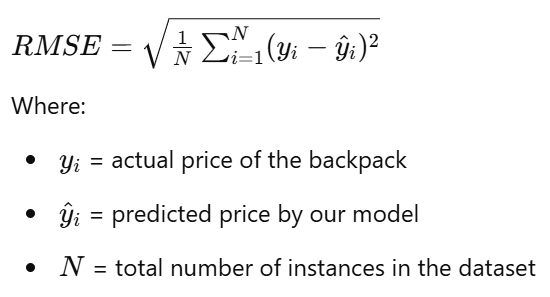

🤔 Why RMSE?

1. Penalizes Large Errors More 🚨: Since RMSE squares the errors before averaging, it gives more weight to larger deviations.
2. Provides a Clear Measure of Accuracy 📉: A lower RMSE indicates that the model's predictions are closer to actual values.
3. Maintains Interpretability 📖: Since RMSE is in the same unit as the target variable (Price), it's easy to understand its impact.

Our goal is to minimize RMSE by selecting the best features, handling missing values effectively, and experimenting with different regression models

# <span style="color:#ffffff; font-size: 1%;">[2] 🔍 Dataset Overview</span>

<div style=" border-bottom: 8px solid #8CBED6; overflow: hidden; border-radius: 10px; height: 45px; width: 100%; display: flex;">
  <div style="height: 100%; width: 65%; background-color: #87CEFA; float: left; text-align: center; display: flex; justify-content: center; align-items: center; font-size: 25px; ">
    <b><span style="color: #5F5F5F; padding: 20px 20px;">[2] 📊🔍 Dataset Overview</span></b>
  </div>
  <div style="height: 100%; width: 35%; background-image: url('https://img.freepik.com/premium-photo/school-bag-backpack-with-supplies-school-blue-background-copy-space-text_188237-985.jpg'); background-size: cover; background-position: center; float: left; border-top-right-radius: 10px; border-bottom-right-radius: 4px;">
  </div>
</div>

In [ ]:
# Importing Libraries

import warnings
warnings.filterwarnings("ignore")

import optuna
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupKFold
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVC
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, median_absolute_error
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import KFold
from scipy import stats
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import catboost as cb
from scipy.optimize import minimize

<b><span style="color: #FFFFFF; background-color: #8CBED6; padding: 20px; font-size: 18px; border-left: 8px solid #87CEFA">  [2.1] Loading the Datasets & Libraries :</span></b>

In [ ]:
# Reading .csv data file

train_data = pd.read_csv("/kaggle/input/playground-series-s5e2/train.csv")
test_data = pd.read_csv("/kaggle/input/playground-series-s5e2/test.csv")
original_data = pd.read_csv('/kaggle/input/student-bag-price-prediction-dataset/Noisy_Student_Bag_Price_Prediction_Dataset.csv')

<b><span style="color: #FFFFFF; background-color: #8CBED6; padding: 20px; font-size: 18px; border-left: 8px solid #87CEFA">  [2.2] Initial Observations or Trends :</span></b>

In [ ]:
 # Having a look at the dataset

In [ ]:
train_data.head()

In [ ]:
test_data.head()

In [ ]:
original_data.head()

In [ ]:
# Checking the number of rows and columns

num_train_rows, num_train_columns = train_data.shape

num_test_rows, num_test_columns = test_data.shape

num_original_rows, num_original_columns = original_data.shape

print("Training Data:")
print(f"Number of Rows: {num_train_rows}")
print(f"Number of Columns: {num_train_columns}\n")

print("Test Data:")
print(f"Number of Rows: {num_test_rows}")
print(f"Number of Columns: {num_test_columns}\n")

print("Original Data:")
print(f"Number of Rows: {num_original_rows}")
print(f"Number of Columns: {num_original_columns}")

In [ ]:
# Creating a table for missing values, unique values and data types of the features

missing_values_train = pd.DataFrame({'Feature': train_data.columns,
                              '[TRAIN] No. of Missing Values': train_data.isnull().sum().values,
                              '[TRAIN] % of Missing Values': ((train_data.isnull().sum().values)/len(train_data)*100)})

missing_values_test = pd.DataFrame({'Feature': test_data.columns,
                             '[TEST] No.of Missing Values': test_data.isnull().sum().values,
                             '[TEST] % of Missing Values': ((test_data.isnull().sum().values)/len(test_data)*100)})

missing_values_original = pd.DataFrame({'Feature': original_data.columns,
                             '[ORIGINAL] No.of Missing Values': original_data.isnull().sum().values,
                             '[ORIGINAL] % of Missing Values': ((original_data.isnull().sum().values)/len(original_data)*100)})

unique_values = pd.DataFrame({'Feature': train_data.columns,
                              'No. of Unique Values[FROM TRAIN]': train_data.nunique().values})

feature_types = pd.DataFrame({'Feature': train_data.columns,
                              'DataType': train_data.dtypes})

merged_df = pd.merge(missing_values_train, missing_values_test, on='Feature', how='left')
merged_df = pd.merge(merged_df, missing_values_original, on='Feature', how='left')
merged_df = pd.merge(merged_df, unique_values, on='Feature', how='left')
merged_df = pd.merge(merged_df, feature_types, on='Feature', how='left')

merged_df

In [ ]:
# Count duplicate rows in train_data
train_duplicates = train_data.duplicated().sum()

# Count duplicate rows in test_data
test_duplicates = test_data.duplicated().sum()

# Count duplicate rows in original_data
original_duplicates = original_data.duplicated().sum()

# Print the results
print(f"Number of duplicate rows in train_data: {train_duplicates}")
print(f"Number of duplicate rows in test_data: {test_duplicates}")
print(f"Number of duplicate rows in original_data: {original_duplicates}")

In [ ]:
# Having a look at the description of all the numerical columns present in the dataset

train_data.describe().T

<div style="background-color: #FEF9E7; border-top: 4px solid #D4AC0D; padding: 40px; border-radius: 8px;font-size: 18px;">
  <h3 style="color: #D4AC0D; font-size: 24px; margin-bottom: 10px;">📊 Dataset Observations</h3>
  <br>

  <h3 style="color: #D4AC0D; font-size: 20px; margin-bottom: 10px;">📌 Dataset Shape</h3>
  <ul>
    <li><strong>Training Data:</strong> 300,000 rows × 11 columns</li>
    <li><strong>Test Data:</strong> 200,000 rows × 10 columns</li>
    <li><strong>Original Data:</strong> 52,500 rows × 10 columns</li>
  </ul>
  <br>

  <h3 style="color: #D4AC0D; font-size: 20px; margin-bottom: 10px;">📉 Missing Values Analysis</h3>
  <p>Several features contain missing values in both the training and test sets. Proper handling of these missing values is crucial for maintaining data integrity and improving model performance. Below are the key observations:</p>

  <ul>
    <li><strong>Color:</strong> ~3.32% missing in train, ~3.39% in test</li>
    <li><strong>Brand:</strong> ~3.24% missing in train, ~3.11% in test</li>
    <li><strong>Material:</strong> ~2.78% missing in train, ~2.81% in test</li>
    <li><strong>Size:</strong> ~2.20% missing in train, ~2.19% in test</li>
    <li><strong>Style:</strong> ~2.66% missing in train, ~2.58% in test</li>
    <li><strong>Laptop Compartment:</strong> ~2.48% missing in train, ~2.48% in test</li>
    <li><strong>Waterproof:</strong> ~2.35% missing in train, ~2.41% in test</li>
    <li><strong>Weight Capacity (kg):</strong> ~0.05% missing in train, ~0.04% in test</li>
  </ul>

  <p>Some features such as <strong>Compartments</strong> and <strong>Price</strong> have no missing values in the training set, while others like <strong>Original Data</strong> show variations in missing data proportions.</p>

  <p>Strategies such as imputation (mean, median, mode) or predictive modeling can be applied to handle these missing values appropriately.</p>
  <br>


  <h3 style="color: #D4AC0D; font-size: 20px; margin-bottom: 10px;">🧐 Key Observations on Data</h3>
  <ul>
    <li><strong>ID:</strong> A unique identifier for each backpack.</li>
    <li><strong>Brand, Material, Size, Style:</strong> Categorical variables that require encoding for machine learning models.</li>
    <li><strong>Compartments:</strong> Numeric, ranges from 1 to 10.</li>
    <li><strong>Laptop Compartment & Waterproof:</strong> Binary categorical features (Yes/No).</li>
    <li><strong>Color:</strong> 6 unique values, with missing data.</li>
    <li><strong>Weight Capacity (kg):</strong> A numerical feature with a wide range, possibly requiring scaling.</li>
    <li><strong>Price:</strong> The target variable in the training set, ranging from 15 to 150.</li>
  </ul>
  <br>

  <h3 style="color: #D4AC0D; font-size: 20px; margin-bottom: 10px;">📊 Summary Statistics</h3>
  <ul>
    <li><strong>Compartments:</strong> Mean: ~5.44, Min: 1, Max: 10.</li>
    <li><strong>Weight Capacity (kg):</strong> Mean: ~18.03, Min: 5, Max: 30.</li>
    <li><strong>Price:</strong> Mean: ~81.41, Min: 15, Max: 150.</li>
  </ul>
  <br>

  <h3 style="color: #D4AC0D; font-size: 20px; margin-bottom: 10px;">🔍 Key Takeaways</h3>
  <ul>
    <li>The dataset includes categorical and numerical features, requiring different preprocessing steps.</li>
    <li>Handling missing values in categorical variables will be a priority.</li>
    <li>Weight Capacity and Price have relatively wide distributions, suggesting possible feature scaling or transformation.</li>
    <li>Feature engineering on categorical variables (like Brand and Material) may improve model performance.</li>
  </ul>
  <br>
</div>


# <span style="color:#ffffff; font-size: 1%;">[3] 💡 Exploratory Data Analysis (EDA)</span>

<div style=" border-bottom: 8px solid #8CBED6; overflow: hidden; border-radius: 10px; height: 45px; width: 100%; display: flex;">
  <div style="height: 100%; width: 65%; background-color: #87CEFA; float: left; text-align: center; display: flex; justify-content: center; align-items: center; font-size: 25px; ">
    <b><span style="color: #5F5F5F; padding: 20px 20px;">[3] 📈💡EDA</span></b>
  </div>
  <div style="height: 100%; width: 35%; background-image: url('https://img.freepik.com/premium-photo/school-bag-backpack-with-supplies-school-blue-background-copy-space-text_188237-985.jpg'); background-size: cover; background-position: center; float: left; border-top-right-radius: 10px; border-bottom-right-radius: 4px;">
  </div>
</div>

Exploratory Data Analysis (**EDA**) is like detective work for data! 🕵️‍♂️ It helps us understand patterns, detect anomalies, and uncover relationships before diving into modeling. Through EDA, we can **visualize**, **clean**, and **transform** the dataset in meaningful ways.

### 🏗️ What We'll Do in Our EDA:

1️⃣ **Numerical Feature Analysis** 📊  
   - We'll use **boxplots** to check for outliers and distribution shape.  
   - **Histograms** will help us visualize how the numerical data is spread.

2️⃣ **Categorical Feature Analysis** 🔠  
   - **Countplots** will show the frequency of each category.  
   - **Pie charts** will help us understand the proportion of different categories.

3️⃣ **Target Variable Analysis** 🎯  
   - Since the **target variable is continuous**, we'll use **histograms** to see its distribution.  
   - **Boxplots** will help detect any extreme values or patterns.

---

> **📝 NOTE:** Some features that appear as **numerical** in the dataset are actually more **categorical in nature** (since they have very few unique values). We’ll treat them accordingly to ensure meaningful insights!

In [ ]:
numerical_variables = ['Weight Capacity (kg)']
target_variable = 'Price' 
categorical_variables = ['Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment','Waterproof', 'Style', 'Color']

<b><span style="color: #FFFFFF; background-color: #8CBED6; padding: 20px; font-size: 18px; border-left: 8px solid #87CEFA">  [3.1] Numerical Feature Analysis</span></b>

In [ ]:
# Analysis of all NUMERICAL features

# Define a custom color palette
custom_palette = ['#3498db', '#e74c3c','#2ecc71']

# Add 'Dataset' column to distinguish between train and test data
train_data['Dataset'] = 'Train'
test_data['Dataset'] = 'Test'
original_data['Dataset'] = 'Original'

variables = [col for col in train_data.columns if col in numerical_variables]

# Function to create and display a row of plots for a single variable
def create_variable_plots(variable):
    sns.set_style('whitegrid')
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Box plot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=pd.concat([train_data, test_data,original_data.dropna()]), x=variable, y="Dataset", palette=custom_palette)
    plt.xlabel(variable)
    plt.title(f"Box Plot for {variable}")

    # Separate Histograms
    plt.subplot(1, 2, 2)
    sns.histplot(data=train_data, x=variable, color=custom_palette[0], kde=True, bins=30, label="Train")
    sns.histplot(data=test_data, x=variable, color=custom_palette[1], kde=True, bins=30, label="Test")
    sns.histplot(data=original_data.dropna(), x=variable, color=custom_palette[2], kde=True, bins=30, label="Original")
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title(f"Histogram for {variable} [TRAIN, TEST & ORIGINAL]")
    plt.legend()

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.show()

# Perform univariate analysis for each variable
for variable in variables:
    create_variable_plots(variable)

# Drop the 'Dataset' column after analysis
train_data.drop('Dataset', axis=1, inplace=True)
test_data.drop('Dataset', axis=1, inplace=True)
original_data.drop('Dataset', axis=1, inplace=True)

<b><span style="color: #FFFFFF; background-color: #8CBED6; padding: 20px; font-size: 18px; border-left: 8px solid #87CEFA">  [3.2] Categorical Feature Analysis</span></b>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pie_chart_palette = ['#33638d', '#28ae80', '#d3eb0c', '#ff9a0b', '#7e03a8', '#35b779', '#fde725', '#440154', '#90d743', '#482173', '#22a884', '#f8961e']

countplot_color = '#5C67A3'

# Function to create and display a row of plots for a single categorical variable
def create_categorical_plots(variable):
    sns.set_style('whitegrid')
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Pie Chart
    plt.subplot(1, 2, 1)
    train_data[variable].value_counts().plot.pie(
        autopct='%1.1f%%', colors=pie_chart_palette, wedgeprops=dict(width=0.3), startangle=140
    )
    plt.title(f"Pie Chart for {variable}")

    # Bar Graph
    plt.subplot(1, 2, 2)
    sns.countplot(
        data=pd.concat([train_data, test_data, original_data.dropna()]), 
        x=variable, 
        color=countplot_color,  # Using a single color for the countplot
        alpha=0.8  # Setting 80% opacity
    )
    plt.xlabel(variable)
    plt.ylabel("Count")
    plt.title(f"Bar Graph for {variable} [TRAIN, TEST & ORIGINAL Combined]")

    # Adjust spacing between subplots
    plt.tight_layout()
    
    # Show the plots
    plt.show()

# Perform univariate analysis for each categorical variable
for variable in categorical_variables:
    create_categorical_plots(variable)

<b><span style="color: #FFFFFF; background-color: #8CBED6; padding: 20px; font-size: 18px; border-left: 8px solid #87CEFA">  [3.3] Target Feature Analysis</span></b>

In [ ]:
# Analysis of the TARGET feature (Continuous)

# Define a custom color palette
target_palette = ['#3498db', '#e74c3c']

# Add 'Dataset' column to distinguish between Train and Original data
train_data['Dataset'] = 'Train'
original_data['Dataset'] = 'Original'

# Function to create and display a row of plots for the target variable
def create_target_plots(target_variable):
    sns.set_style('whitegrid')
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Box Plot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=pd.concat([train_data, original_data.dropna()]), x=target_variable, y="Dataset", palette=target_palette)
    plt.xlabel(target_variable)
    plt.title(f"Box Plot for Target Feature '{target_variable}'")

    # Histogram
    plt.subplot(1, 2, 2)
    sns.histplot(data=train_data, x=target_variable, color=target_palette[0], kde=True, bins=30, label="Train")
    sns.histplot(data=original_data.dropna(), x=target_variable, color=target_palette[1], kde=True, bins=30, label="Original")
    plt.xlabel(target_variable)
    plt.ylabel("Frequency")
    plt.title(f"Histogram for Target Feature '{target_variable}' [TRAIN & ORIGINAL]")
    plt.legend()

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.show()

# Perform univariate analysis for the target variable
create_target_plots(target_variable)

# Drop the 'Dataset' column after analysis
train_data.drop('Dataset', axis=1, inplace=True)
original_data.drop('Dataset', axis=1, inplace=True)

<b><span style="color: #FFFFFF; background-color: #8CBED6; padding: 20px; font-size: 18px; border-left: 8px solid #87CEFA">  [3.4] Bivariate Analysis</span></b>

In [ ]:
variables = [col for col in train_data.columns if col in numerical_variables]

cat_variables_train = ['Compartments','Weight Capacity (kg)', 'Price']
cat_variables_test = ['Compartments','Weight Capacity (kg)']

# Adding variables to the existing list
train_variables = variables + cat_variables_train
test_variables = variables + cat_variables_test

# Calculate correlation matrices for train_data and test_data
corr_train = train_data[train_variables].corr()
corr_test = test_data[test_variables].corr()

# Create masks for the upper triangle
mask_train = np.triu(np.ones_like(corr_train, dtype=bool))
mask_test = np.triu(np.ones_like(corr_test, dtype=bool))

# Set the text size and rotation
annot_kws = {"size": 8, "rotation": 45}

# Generate heatmaps for train_data
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
ax_train = sns.heatmap(corr_train, mask=mask_train, cmap='viridis', annot=True,
                      square=True, linewidths=.5, xticklabels=1, yticklabels=1, annot_kws=annot_kws)
plt.title('Correlation Heatmap - Train Data')

# Generate heatmaps for test_data
plt.subplot(1, 2, 2)
ax_test = sns.heatmap(corr_test, mask=mask_test, cmap='viridis', annot=True,
                     square=True, linewidths=.5, xticklabels=1, yticklabels=1, annot_kws=annot_kws)
plt.title('Correlation Heatmap - Test Data')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# <span style="color:#ffffff; font-size: 1%;">[4] 🛠️ Data Preprocessing</span>

<div style=" border-bottom: 8px solid #8CBED6; overflow: hidden; border-radius: 10px; height: 45px; width: 100%; display: flex;">
  <div style="height: 100%; width: 65%; background-color: #87CEFA; float: left; text-align: center; display: flex; justify-content: center; align-items: center; font-size: 25px; ">
    <b><span style="color: #5F5F5F; padding: 20px 20px;">[4] 🛠️🧹 Data Preprocessing</span></b>
  </div>
  <div style="height: 100%; width: 35%; background-image: url('https://img.freepik.com/premium-photo/school-bag-backpack-with-supplies-school-blue-background-copy-space-text_188237-985.jpg'); background-size: cover; background-position: center; float: left; border-top-right-radius: 10px; border-bottom-right-radius: 4px;">
  </div>
</div>

In [ ]:
# Drop null values from original_data
#original_data = original_data.dropna()

# Print the count of null values in original_data
#print(original_data.isnull().sum())

# Combine original_data with train_data
#train_data = pd.concat([train_data, original_data], axis=0).reset_index(drop=True)

<b><span style="color: #FFFFFF; background-color: #8CBED6; padding: 20px; font-size: 18px; border-left: 8px solid #87CEFA">  [4.1] Data Imputation (Handling missing values)</span></b>

### Understanding Each Feature and Missing Data Handling

#### 1️⃣ Brand (`~3.24%` missing in train, `~3.11%` in test)
- **Unique Values:** Jansport, Under Armour, Nike, Adidas, Puma, NaN  
- **Imputation Strategy:** Since it's categorical with only 5 unique brands, we can impute missing values with the **mode** (most frequent brand).

#### 2️⃣ Material (`~2.78%` missing in train, `~2.81%` in test)
- **Unique Values:** Leather, Canvas, Nylon, Polyester, NaN  
- **Imputation Strategy:** **Mode imputation** works best here since materials are limited categories.

#### 3️⃣ Size (`~2.20%` missing in train, `~2.19%` in test)
- **Unique Values:** Medium, Small, Large, NaN  
- **Imputation Strategy:** Since it's a well-defined categorical variable, we use **mode imputation**.

#### 4️⃣ Compartments (✅ No missing values)
- **Unique Values:** 10 unique numerical values  
- **Imputation Strategy:** ✅ No action needed.

#### 5️⃣ Laptop Compartment (`~2.48%` missing in train, `~2.48%` in test)
- **Unique Values:** Yes, No, NaN  
- **Imputation Strategy:** Since it's a **binary categorical** variable, we use **mode imputation**.

#### 6️⃣ Waterproof (`~2.35%` missing in train, `~2.41%` in test)
- **Unique Values:** Yes, No, NaN  
- **Imputation Strategy:** **Mode imputation** is best.

#### 7️⃣ Style (`~2.66%` missing in train, `~2.58%` in test)
- **Unique Values:** Tote, Messenger, Backpack, NaN  
- **Imputation Strategy:** **Mode imputation**.

#### 8️⃣ Color (`~3.32%` missing in train, `~3.39%` in test)
- **Unique Values:** Black, Green, Red, Blue, Gray, Pink, NaN  
- **Imputation Strategy:** **Mode imputation**.

#### 9️⃣ Weight Capacity (kg) (`~0.05%` missing in train, `~0.04%` in test)
- **Unique Values:** Numeric  
- **Imputation Strategy:** Since it is a **continuous numerical variable**, we use **median imputation** to prevent extreme values from affecting the distribution.

In [ ]:
# Define imputation strategies
categorical_features = ["Brand", "Material", "Size", "Laptop Compartment", "Waterproof", "Style", "Color"]
numerical_features = ["Weight Capacity (kg)", "Price"]

# Fill categorical missing values with mode (most frequent value)
for col in categorical_features:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)
    test_data[col].fillna(test_data[col].mode()[0], inplace=True)

# Fill numerical missing values with median
for col in numerical_features:
    train_data[col].fillna(train_data[col].median(), inplace=True)

test_data["Weight Capacity (kg)"].fillna(test_data["Weight Capacity (kg)"].median(), inplace=True)

<b><span style="color: #FFFFFF; background-color: #8CBED6; padding: 20px; font-size: 18px; border-left: 8px solid #87CEFA">  [4.2] Feature Engineering </span></b>

Imagine you're making a **smoothie**. You have **raw ingredients** like bananas, strawberries, and milk. But instead of using them as they are, you **blend them together** to create a delicious, more useful drink. 🎉

Feature extraction in Machine Learning works the same way! Instead of using raw data directly, we **combine, transform, or derive new features** to make the data **more meaningful and powerful** for prediction models.

---

### 🔥 Why Feature Extraction is Important?
- Helps the model **understand relationships** better.
- **Reduces noise** by focusing on important aspects.
- Improves **prediction accuracy** by making data more useful.
- Helps in **dimensionality reduction** (fewer, better features = better performance).

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

def perform_feature_engineering(df):
    # Brand Material Interaction - Certain materials may be common for specific brands
    df['Brand_Material'] = df['Brand'] + '_' + df['Material']

    # Brand & Size Interaction - Some brands may produce only specific sizes
    df['Brand_Size'] = df['Brand'] + '_' + df['Size']

    # Has Laptop Compartment - Convert Yes/No to 1/0 for easier analysis
    df['Has_Laptop_Compartment'] = df['Laptop Compartment'].map({'Yes': 1, 'No': 0})

    # Is Waterproof - Convert Yes/No to 1/0 for easier analysis
    df['Is_Waterproof'] = df['Waterproof'].map({'Yes': 1, 'No': 0})

    # Compartments Binning - Group compartments into categories
    df['Compartments_Category'] = pd.cut(df['Compartments'], bins=[0, 2, 5, 10, np.inf], labels=['Few', 'Moderate', 'Many', 'Very Many'])

    # Weight Capacity Ratio - Normalize weight capacity using the max value
    df['Weight_Capacity_Ratio'] = df['Weight Capacity (kg)'] / df['Weight Capacity (kg)'].max()

    # Interaction Feature: Weight vs. Compartments - Some bags may hold more with less compartments
    df['Weight_to_Compartments'] = df['Weight Capacity (kg)'] / (df['Compartments'] + 1)  # Avoid division by zero

    # Style and Size Interaction - Certain styles may correlate with sizes
    df['Style_Size'] = df['Style'] + '_' + df['Size']

    return df

# Apply the function to the training data
train_data = perform_feature_engineering(train_data)

# Apply the function to the test data
test_data = perform_feature_engineering(test_data)

In [ ]:
id_test = test_data['id']

columns_to_drop = ['id']
train_data.drop(columns_to_drop, axis=1, inplace=True)
test_data.drop(columns_to_drop, axis=1, inplace=True)

<b><span style="color: #FFFFFF; background-color: #8CBED6; padding: 20px; font-size: 18px; border-left: 8px solid #87CEFA">  [4.3] Outlier Detection </span></b>

Imagine you’re a teacher grading a math test. Most students score between **60 and 90**, but **one student scores 5 and another scores 100**. These are **outliers**—extreme values that don’t follow the usual trend. 📊

Outlier detection helps us **identify and handle** these unusual values so that they don’t mislead our models.

---

### 🔥 Why is Outlier Detection Important?
- **Prevents models from being biased** by extreme values.
- **Improves accuracy** by focusing on realistic data.
- **Avoids overfitting**, where the model learns from noise instead of real patterns.
- **Helps in feature scaling**, ensuring values are within a reasonable range.

---

### 📉 Outlier Detection in Action! (Using IQR)

One of the most **common methods** for detecting outliers is the **Interquartile Range (IQR) method**.  
Here’s how it works:

1. **Find Q1 (10th percentile) and Q3 (90th percentile)** → These define the middle range of the data.
2. **Calculate the Interquartile Range (IQR)**:  
   IQR = Q3 - Q1
3. **Define Lower and Upper Boundaries**:  
   Lower Bound = Q1 - 1.5 * IQR
   Upper Bound = Q3 + 1.5 * IQR
5. **Anything outside these bounds is considered an outlier!** 🚨

In [ ]:
columns_to_check = ['Weight Capacity (kg)','Weight_Capacity_Ratio','Weight_to_Compartments']

# Function to remove outliers using IQR and visualize
def remove_outliers_iqr_with_plot(data, column):
    Q1 = data[column].quantile(0.05)
    Q3 = data[column].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the data
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    
    # Calculate the number of rows deleted
    rows_deleted = len(data) - len(filtered_data)
    
    # Plot the distribution with outliers
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[column], color='lightblue', flierprops={'marker': 'o', 'markersize': 5, 'markerfacecolor': 'red'})
    
    # Highlight Q1 and Q3
    plt.axvline(Q1, color='green', linestyle='--', label='Q1 (10th Percentile)')
    plt.axvline(Q3, color='blue', linestyle='--', label='Q3 (90th Percentile)')
    
    # Highlight lower and upper bounds
    plt.axvline(lower_bound, color='red', linestyle='-', label='Lower Bound')
    plt.axvline(upper_bound, color='red', linestyle='-', label='Upper Bound')

    plt.title(f'Outlier Detection for {column}')
    plt.legend()
    plt.xlabel(column)
    plt.show()
    
    return filtered_data, rows_deleted

# Apply function to each numerical column and visualize
rows_deleted_total = 0

for column in columns_to_check:
    train_data, rows_deleted = remove_outliers_iqr_with_plot(train_data, column)
    rows_deleted_total += rows_deleted
    print(f"Rows deleted for {column}: {rows_deleted}")

print(f"Total rows deleted: {rows_deleted_total}")

In [ ]:
y = train_data['Price']

<b><span style="color: #FFFFFF; background-color: #8CBED6; padding: 20px; font-size: 18px; border-left: 8px solid #87CEFA">  [4.4] Transformation of Distributions </span></b>

Sometimes, numerical features in a dataset are **highly skewed**, meaning their distribution is **not symmetrical**.  
A skewed distribution can **negatively impact** machine learning models, especially those that assume normality (like linear regression).

---

### 🔥 Why Do We Transform Skewed Data?
- **Improves model performance** by making data closer to a normal distribution.
- **Reduces the impact of extreme values** (outliers).
- **Enhances interpretability** of data for statistical analysis.

In [ ]:
# [FOR TRAIN]
# Identify features with skewness greater than 0.75
skewed_features = train_data[numerical_variables].skew()[train_data[numerical_variables].skew() > 0.75].index.values

# Print the list of variables to be transformed
print("Features to be transformed (skewness > 0.75):")
display(skewed_features)

# Plot skewed features before transformation
for feature in skewed_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_data[feature], bins=50, kde=True, color='blue')
    plt.title(f'Distribution of {feature} before log transformation')
    plt.show()

# Apply log1p transformation to skewed features
train_data[skewed_features] = np.log1p(train_data[skewed_features])

# Plot skewed features after transformation
for feature in skewed_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_data[feature], bins=50, kde=True, color='green')
    plt.title(f'Distribution of {feature} after log transformation')
    plt.show()

In [ ]:
# [FOR TEST]
# Identify features with skewness greater than 0.75
skewed_features = test_data[numerical_variables].skew()[test_data[numerical_variables].skew() > 0.75].index.values

# Print the list of variables to be transformed
print("Features to be transformed (skewness > 0.75):")
display(skewed_features)

# Plot skewed features before transformation
for feature in skewed_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(test_data[feature], bins=50, kde=True, color='blue')
    plt.title(f'Distribution of {feature} before log transformation')
    plt.show()

# Apply log1p transformation to skewed features
test_data[skewed_features] = np.log1p(test_data[skewed_features])

In [ ]:
# Plot skewed features after transformation
for feature in skewed_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(test_data[feature], bins=50, kde=True, color='green')
    plt.title(f'Distribution of {feature} after log transformation')
    plt.show()

<b><span style="color: #FFFFFF; background-color: #8CBED6; padding: 20px; font-size: 18px; border-left: 8px solid #87CEFA">  [4.4] Feature Encoding </span></b>

Imagine you're teaching a **robot** about colors. It doesn’t understand words like **"Red" or "Blue"**, but it understands **numbers**! 🤖  
Feature encoding helps us **convert categorical data** into a format that machine learning models can understand. 🚀

---

### 🔥 Why Feature Encoding?
- ML models **work with numbers, not text**.
- Helps in **handling categorical data efficiently**.
- Reduces complexity and improves **model performance**.

In [ ]:
# Selecting specific columns for encoding
columns_to_encode = ['Brand', 'Material', 'Size', 'Laptop Compartment','Waterproof', 'Style', 'Color','Brand_Material', 'Brand_Size', 'Has_Laptop_Compartment','Is_Waterproof', 'Compartments_Category', 'Style_Size']
train_data_to_encode = train_data[columns_to_encode]
test_data_to_encode = test_data[columns_to_encode]

# Dropping selected columns for scaling
train_data_to_scale = train_data.drop(columns_to_encode, axis=1)
test_data_to_scale = test_data.drop(columns_to_encode, axis=1)

train_data_encoded = pd.get_dummies(train_data_to_encode, columns=columns_to_encode, drop_first=True)
test_data_encoded = pd.get_dummies(test_data_to_encode, columns=columns_to_encode, drop_first=True)

In [ ]:
train_data_encoded.head()

In [ ]:
test_data_encoded.head()

<b><span style="color: #FFFFFF; background-color: #8CBED6; padding: 20px; font-size: 18px; border-left: 8px solid #87CEFA">  [4.5] Feature Scaling </span></b>

Imagine you're comparing the **height of buildings** and the **weight of apples**. One is in **meters**, the other in **grams**—they have completely different scales! 📏🍏  
Feature scaling helps us **standardize numerical data** so that all features have a similar range, preventing models from favoring one over another.

---

### 🔥 Why Feature Scaling?
- **Prevents bias** toward larger values (e.g., `Weight Capacity (kg)` vs `Price`).
- **Improves model convergence** (especially for gradient-based algorithms like Neural Networks & Logistic Regression).
- **Enhances performance** of distance-based models (like KNN, SVM).

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
minmax_scaler = MinMaxScaler()

# Fit the scaler on the training data
minmax_scaler.fit(train_data_to_scale.drop(['Price'], axis=1))

# Scale the training data
scaled_data_train = minmax_scaler.transform(train_data_to_scale.drop(['Price'], axis=1))
scaled_train_df = pd.DataFrame(scaled_data_train, columns=train_data_to_scale.drop(['Price'], axis=1).columns)

# Scale the test data using the parameters from the training data
scaled_data_test = minmax_scaler.transform(test_data_to_scale)
scaled_test_df = pd.DataFrame(scaled_data_test, columns=test_data_to_scale.columns)

In [ ]:
scaled_train_df.head()

In [ ]:
scaled_test_df.head()

In [ ]:
# Concatenate train datasets
train_data_combined = pd.concat([train_data_encoded.reset_index(drop=True), scaled_train_df.reset_index(drop=True)], axis=1)

# Concatenate test datasets
test_data_combined = pd.concat([test_data_encoded.reset_index(drop=True), scaled_test_df.reset_index(drop=True)], axis=1)

In [ ]:
train_data_combined.head()

In [ ]:
test_data_combined.head()

# <span style="color:#ffffff; font-size: 1%;">[5] 🏗️ Model Building & Evaluation</span>

<div style=" border-bottom: 8px solid #8CBED6; overflow: hidden; border-radius: 10px; height: 45px; width: 100%; display: flex;">
  <div style="height: 100%; width: 65%; background-color: #87CEFA; float: left; text-align: center; display: flex; justify-content: center; align-items: center; font-size: 25px; ">
    <b><span style="color: #5F5F5F; padding: 20px 20px;">[5] 🏗️📊 Model Building & Evaluation</span></b>
  </div>
  <div style="height: 100%; width: 35%; background-image: url('https://img.freepik.com/premium-photo/school-bag-backpack-with-supplies-school-blue-background-copy-space-text_188237-985.jpg'); background-size: cover; background-position: center; float: left; border-top-right-radius: 10px; border-bottom-right-radius: 4px;">
  </div>
</div>

In [ ]:
# Define Cross-Validation strategy
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# CatBoost parameters (optimized)
catboost_params = {
    "iterations": 300,
    "learning_rate": 0.1,
    "depth": 6,
    "verbose": 0,
    "random_seed": 42
}

# Lists to store results
rmse_scores = []
mae_scores = []
oof_preds = np.zeros(len(train_data_combined))
test_preds_cb = np.zeros(len(test_data_combined))

# Store feature importances
feature_importance_list = np.zeros(train_data_combined.shape[1])

# Perform K-Fold Cross Validation
print("Training using Cross-Validation...")
for fold, (train_idx, val_idx) in enumerate(kf.split(train_data_combined)):
    print(f"\nTraining Fold {fold+1}...")

    X_train, X_val = train_data_combined.iloc[train_idx], train_data_combined.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Define model
    cb_model = cb.CatBoostRegressor(**catboost_params)

    # Train model
    cb_model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50, verbose=0)

    # Predict on validation set
    val_preds_cb = cb_model.predict(X_val)
    oof_preds[val_idx] = val_preds_cb

    # Calculate and store scores
    rmse = np.sqrt(mean_squared_error(y_val, val_preds_cb))
    mae = mean_absolute_error(y_val, val_preds_cb)
    rmse_scores.append(rmse)
    mae_scores.append(mae)

    print(f"Fold {fold+1} RMSE: {rmse:.4f}, MAE: {mae:.4f}")

    # Accumulate feature importances
    feature_importance_list += cb_model.get_feature_importance() / kf.get_n_splits()

    # Predict on test data and average across folds
    test_preds_cb += cb_model.predict(test_data_combined) / kf.get_n_splits()

In [ ]:
# Final evaluation
cv_rmse = np.mean(rmse_scores)
cv_mae = np.mean(mae_scores)

print("\nCross-Validation Results:")
print(f"Mean RMSE: {cv_rmse:.4f}")
print(f"Mean MAE: {cv_mae:.4f}")

# Plot RMSE per fold if needed
if len(rmse_scores) > 1:
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(rmse_scores) + 1), rmse_scores, marker='o', linestyle='--', color='b', label='RMSE per Fold')
    plt.axhline(y=cv_rmse, color='r', linestyle='-', label=f'Avg RMSE: {cv_rmse:.4f}')
    plt.xlabel('Fold')
    plt.ylabel('RMSE')
    plt.title('RMSE per Fold')
    plt.legend()
    plt.show()

In [ ]:
# Feature importance visualization
feature_importance_df = pd.DataFrame({
    'Feature': train_data_combined.columns,
    'Importance': feature_importance_list
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'][:20], feature_importance_df['Importance'][:20], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Top 20 Feature Importances - CatBoost')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

# Determine threshold for feature selection
median_importance = np.median(feature_importance_list)
threshold = max(median_importance, 0.05 * np.max(feature_importance_list))  # Keep features > 5% of max importance

selected_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature'].tolist()

print(f"Selected {len(selected_features)} features out of {train_data_combined.shape[1]} using threshold: {threshold:.4f}")

<b><span style="color: #FFFFFF; background-color: #8CBED6; padding: 20px; font-size: 18px; border-left: 8px solid #87CEFA"> [5.1] 🔀 Twist: When Simplicity Wins Over Complexity 🤡 </span></b>



So after hours of hyperparameter tuning, diving deep into EDA, feature engineering, trying fancy transformations, gradient boosting and stacking models – what do we get?

Not even close to two ridiculously simple baselines. (Credits : [@cdeotte](https://www.kaggle.com/code/cdeotte/two-baseline-models-lb-38-91))

🔹 Moral of the Story?
👉 Sometimes, less is more. Or in our case: less effort, better results. 🤡

And so, in the spirit of humility and with a tear of acceptance, we set aside our sophisticated methods and do the only logical thing – use Chris's baseline method (with a few small tweaks) and generate our final submission.

In [ ]:
from cuml.preprocessing import TargetEncoder  # RAPIDS Target Encoding

#### [5.1.1] Baseline 1 – Global Mean Prediction

In [ ]:
# Compute the mean price from training data
train_mean_price = train_data['Price'].mean()

# Apply to test data
test_data['Baseline1_Price'] = train_mean_price

print(f"Baseline 1 - Mean Price Prediction: {train_mean_price:.2f}")

#### [5.1.2] Baseline 2 – Target Encoding on "Weight Capacity (kg)"

In [ ]:
# Initialize RAPIDS Target Encoder
TE = TargetEncoder(n_folds=25, smooth=20, split_method='random', stat='mean')

# Fit on training data
train_data['Baseline2_Price'] = TE.fit_transform(train_data['Weight Capacity (kg)'], train_data['Price'])

# Apply transformation to test data
test_data['Baseline2_Price'] = TE.transform(test_data['Weight Capacity (kg)'])

print("Target Encoding on Weight Capacity Applied.")

#### [5.1.3] Enhancement – Averaging of Both Baselines

In [ ]:
# For CB from Optuna
best_params = {'iterations': 272, 'learning_rate': 0.07831991170767265, 'depth': 4, 'l2_leaf_reg': 6.24363158355284, 'border_count': 142, 'bagging_temperature': 0.17647659016389794, 'random_seed': 42, 'verbose': 0}

In [ ]:
# 🛠️ Load predictions from previous steps
catboost_preds = test_preds_cb  # From trained CatBoost model
te_preds = test_data['Baseline2_Price'].values  # From Target Encoding on "Weight Capacity (kg)"

# 🛠️ Optimize Alpha for Blending
def optimize_blend(alpha, cb_preds, te_preds, y_true):
    """ Function to compute RMSE given an alpha blend ratio. """
    blended_preds = alpha * te_preds + (1 - alpha) * cb_preds
    return np.sqrt(mean_squared_error(y_true, blended_preds))

# 🛠️ Use training data for optimization
X_train, X_val, y_train, y_val = train_test_split(train_data_combined[selected_features], y, test_size=0.2, random_state=42)

# Predict on validation data
cb_val_preds = np.mean([cb.CatBoostRegressor(**best_params).fit(X_train, y_train).predict(X_val) for _ in range(3)], axis=0)
te_val_preds = TE.transform(X_val['Weight Capacity (kg)'])

# Find the best blending weight using scipy minimize
result = minimize(lambda a: optimize_blend(a, cb_val_preds, te_val_preds, y_val), x0=[0.5], bounds=[(0, 1)])
best_alpha = result.x[0]

print(f"Optimal Blending Weight (alpha) Found: {best_alpha:.4f}")

# 🛠️ Apply Optimal Blending on Test Data
test_data['Final_Price'] = best_alpha * te_preds + (1 - best_alpha) * catboost_preds

print(f"Final Predictions Created using Optimal Blending (Alpha = {best_alpha:.4f}).")

In [ ]:
# Create submission file
submission_df = pd.DataFrame({
    'id': id_test,
    'Price': test_data['Final_Price'].values
})

# Save to CSV
submission_df.to_csv("submission.csv", index=False)

submission_df.head(5)

### 📝Submission Notes

| Test Score  | Notes                                           | Version |
|--------|-----------------------------------------------|---------|
| 39.27571  | XGBoost, LightGBM, CatBoost, RandomForest (Simple Average Ensemble) | v6     |
| 39.18808 | XGBoost, LightGBM, CatBoost, RandomForest (Weighted Average Ensemble) | v11     |
| 39.18955 | XGBoost, LightGBM, CatBoost, RandomForest (Weighted Average Ensemble  with Feature Importance) | v12     |
| 39.18618  | XGBoost, LightGBM, CatBoost, RandomForest (Weighted Average Ensemble  with Feature Importance) | v13     |
| 39.15355  | ONLY CatBoost | v14     |
| 39.14376  | ONLY CatBoost w 10 fold CV | v18     |
| 39.14428 | ONLY CatBoost w 8 fold CV and Feature Selection | v20     |
| 39.14335 | ONLY CatBoost w 8 fold CV, Feature Selection and Outlier Removal (10%) | v21     |
| 39.14211 | ONLY CatBoost w 8 fold CV, Feature Selection (5% of highest)and Outlier Removal (10%) | v22     |
| 39.10469 | Average of Two Simple Baselines | v23     |
|  39.16466 | Simple baseline 1 ONLY w Outlier Removal (Accidental)| v24     |
| 39.09411  | Simple baseline 2 ONLY w Outlier Removal (Accidental)| v26     |
| 39.07753  | Simple baseline 2 ONLY wo Outlier Removal | v28     |
| -  | Baseline 2 + CB | v30     |

### 🙌 Thank You!

Thanks for reading! 💙 If you have any suggestions, feel free to drop a comment – I’m eager to learn and grow in this amazing community! 🌱 I’ll be continuously updating this notebook with feature engineering, modeling, and detailed EDA observations for this competition.

### 📢 If you found this helpful, please upvote to support! 👍 Happy coding and best of luck! 🚀😊